In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Load in all three datsets.

In [ ]:
degree_original = pd.read_csv("degrees-that-pay-back.csv")
degree_original.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
college_original = pd.read_csv('salaries-by-college-type.csv')
college_original.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [ ]:
region_original = pd.read_csv("salaries-by-region.csv")
region_original.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [ ]:
#Take only the relevant columns of each dataset 
degree = degree_original[["Undergraduate Major", "Starting Median Salary"]]
college = college_original[["School Name" , "School Type", "Starting Median Salary"]]
region = region_original[["School Name", "Region", "Starting Median Salary"]]

In [ ]:
#Merge college and region data based on school name
#Used inner so only captures overlapping school names 
merge = pd.merge(college, region, how='inner')
merge = merge[["School Name", "Region", "School Type", "Starting Median Salary"]]
merge

,School Name,Region,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,"$72,200.00"
1,California Institute of Technology (CIT),California,Engineering,"$75,500.00"
2,Harvey Mudd College,California,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,"$62,400.00"
4,Cooper Union,Northeastern,Engineering,"$62,200.00"
...,...,...,...,...
263,Austin Peay State University,Southern,State,"$37,700.00"
264,Pittsburg State University,Midwestern,State,"$40,400.00"
265,Southern Utah University,Western,State,"$41,900.00"
266,Montana State University - Billings,Western,State,"$37,900.00"


In [ ]:
#Cast Starting Median Salary as Integer

degree["Starting Median Salary"] = degree["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')
merge["Starting Median Salary"] = merge["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Add new column with percent difference from salary mean 
salary_mean = merge["Starting Median Salary"].mean()
merge["Percent Salary"] = (merge["Starting Median Salary"] - salary_mean)/salary_mean
merge

,School Name,Region,School Type,Starting Median Salary,Percent Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,0.568077
1,California Institute of Technology (CIT),California,Engineering,75500,0.639748
2,Harvey Mudd College,California,Engineering,71800,0.559390
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,62400,0.355236
4,Cooper Union,Northeastern,Engineering,62200,0.350892
...,...,...,...,...,...
263,Austin Peay State University,Southern,State,37700,-0.181212
264,Pittsburg State University,Midwestern,State,40400,-0.122572
265,Southern Utah University,Western,State,41900,-0.089994
266,Montana State University - Billings,Western,State,37900,-0.176868


In [ ]:
#No longer need salary column, also will be confusing later because salary column in degree dataset also called Starting Median Salary
merge = merge.drop(["Starting Median Salary"], axis=1)

In [ ]:
#Duplicated 50 rows per school in merge dataframe
merge_new = pd.DataFrame(np.repeat(merge.values,50,axis=0))
merge_new.columns = merge.columns 
merge_new

,School Name,Region,School Type,Percent Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
...,...,...,...,...
13395,Black Hills State University,Midwestern,State,-0.233336
13396,Black Hills State University,Midwestern,State,-0.233336
13397,Black Hills State University,Midwestern,State,-0.233336
13398,Black Hills State University,Midwestern,State,-0.233336


In [ ]:
#Duplicated 267 sets of majors 
degree_new = pd.concat([degree]*268, ignore_index=True)
degree_new

,Undergraduate Major,Starting Median Salary
0,Accounting,46000
1,Aerospace Engineering,57700
2,Agriculture,42600
3,Anthropology,36800
4,Architecture,41600
...,...,...
13395,Political Science,40800
13396,Psychology,35900
13397,Religion,34100
13398,Sociology,36500


In [ ]:
#Combine the two big datasets 
degree_merge = pd.concat([merge_new, degree_new], axis=1)
degree_merge

,School Name,Region,School Type,Percent Salary,Undergraduate Major,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Accounting,46000
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Aerospace Engineering,57700
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Agriculture,42600
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Anthropology,36800
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Architecture,41600
...,...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,-0.233336,Political Science,40800
13396,Black Hills State University,Midwestern,State,-0.233336,Psychology,35900
13397,Black Hills State University,Midwestern,State,-0.233336,Religion,34100
13398,Black Hills State University,Midwestern,State,-0.233336,Sociology,36500


In [ ]:
#Adding a new column with adjusted salary based on normalization between starting median salary for a school and the average for all schools in the dataset.
#Placing a heightened level of importance on the institution, not major.
degree_merge["Adjusted Salary"] = degree_merge["Starting Median Salary"] + (salary_mean * degree_merge["Percent Salary"])
degree_merge = degree_merge.drop(["Starting Median Salary", "Percent Salary"], axis=1)
degree_merge["Adjusted Salary"] = degree_merge["Adjusted Salary"].astype('int64') 
degree_merg

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Accounting,72156
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Aerospace Engineering,83856
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Agriculture,68756
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Anthropology,62956
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Architecture,67756
...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,Political Science,30056
13396,Black Hills State University,Midwestern,State,Psychology,25156
13397,Black Hills State University,Midwestern,State,Religion,23356
13398,Black Hills State University,Midwestern,State,Sociology,25756


Now that we have prepared the dataset, we can run the individual models

In [ ]:
#Split into train and test set
X = degree_merge[["School Name", "Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 2.0509784252368915e-11
MSE: 7.220965752126344e-22
RMSE: 2.6871854703623165e-11
R2 Score: 1.0


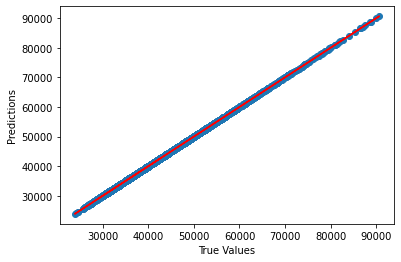

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Linear regression model excluding college name since if you had a student from a college not already in this dataset, would the model still be useful
#Split into train and test set
X = degree_merge[["Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3196.5537313432837
MSE: 17570978.23880597
RMSE: 4191.7750701589375
R2 Score: 0.8641735353761626


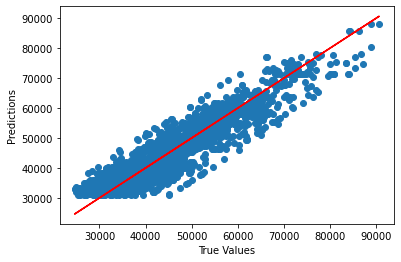

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Lets try binning the values
max = degree_merge["Adjusted Salary"].max()
min = degree_merge["Adjusted Salary"].min()
print("Max:", max)
print("Min:", min)

Max: 103756
Min: 22756


In [ ]:
std1 = degree_merge["Adjusted Salary"].std()
print('std: ' + str(std1))
quantile1 = degree_merge["Adjusted Salary"].quantile(q=0.25)
print('25%: ' + str(quantile1))
quantile2 = degree_merge["Adjusted Salary"].quantile(q=0.50)
print('50%: ' + str(quantile2))
quantile3 = degree_merge["Adjusted Salary"].quantile(q=0.75)
print('75%: ' + str(quantile3))


std: 11262.313395753694
25%: 35656.0
50%: 41656.0
75%: 51456.0


In [ ]:
#Based on the standard deviation shown above, I guess it makes sense to create bins of $5,000 from $20,000 USD to $110,000 USD
interval_range = pd.interval_range(start=0, freq=5000, end=110000)
degree_merge["Salary Range"] = pd.cut(degree_merge["Adjusted Salary"], bins = interval_range)

In [ ]:
#Random Forest Model on Binned Data
from sklearn.ensemble import RandomForestClassifier

#Split into train and test set
X = degree_merge[["School Name", "Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Salary Range"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_x_train = enc.transform(X_train).toarray()
enc_x_test = enc.transform(X_test).toarray()

enc2 = OneHotEncoder()
enc2.fit(y)

enc_y_train = enc2.transform(y_train).toarray()
enc_y_test = enc2.transform(y_test).toarray()

model = RandomForestClassifier(n_estimators = 10)
random_forest = model.fit(enc_x_train, enc_y_train)

y_pred = random_forest.predict(enc_x_test)

print("MAE:" , metrics.mean_absolute_error(enc_y_test, y_pred))
print("MSE:", metrics.mean_squared_error(enc_y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(enc_y_test, y_pred)))

MAE: 0.05725279850746269
MSE: 0.05725279850746269
RMSE: 0.23927557022701396


Now let's do the same thing except we adjust salary by major instead of the college.

In [ ]:
#Same dataset preparation as before
degree_original = pd.read_csv("degrees-that-pay-back.csv")
college_original = pd.read_csv('salaries-by-college-type.csv')
region_original = pd.read_csv("salaries-by-region.csv")

#Extract relevant columns

degree = degree_original[["Undergraduate Major", "Starting Median Salary"]]
college = college_original[["School Name" , "School Type", "Starting Median Salary"]]
region = region_original[["School Name", "Region", "Starting Median Salary"]]

#Merge college and region datasets

merge = pd.merge(college, region, how='inner')
merge = merge[["School Name", "Region", "School Type", "Starting Median Salary"]]

#Cast Starting Median Salary as Integer

degree["Starting Median Salary"] = degree["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')
merge["Starting Median Salary"] = merge["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')

#Duplicated 50 rows per school in merge dataframe
merge_new = pd.DataFrame(np.repeat(merge.values,50,axis=0))
merge_new.columns = merge.columns 

#Duplicated 267 sets of majors 
degree_new = pd.concat([degree]*268, ignore_index=True)
degree_new.rename(columns = {'Starting Median Salary' : 'Starting Major Salary'}, inplace = True)

#Combine the two big datasets 
degree_merge = pd.concat([merge_new, degree_new], axis=1)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Calculate mean salary across different majors
mean_major_salary = degree_merge["Starting Major Salary"].mean()

In [ ]:
#Add new column with percent difference from mean major salary to use as a scale factor
#Here we place a heightened level of importance on a student's major, not the college they attend
degree_merge["Scaled Salary Factor (%)"] = (degree_merge["Starting Major Salary"] - mean_major_salary)/mean_major_salary
degree_merge

,School Name,Region,School Type,Starting Median Salary,Undergraduate Major,Starting Major Salary,Scaled Salary Factor (%)
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,Accounting,46000,0.038140
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,Aerospace Engineering,57700,0.302189
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,Agriculture,42600,-0.038592
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,Anthropology,36800,-0.169488
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,Architecture,41600,-0.061160
...,...,...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,35300,Political Science,40800,-0.079215
13396,Black Hills State University,Midwestern,State,35300,Psychology,35900,-0.189799
13397,Black Hills State University,Midwestern,State,35300,Religion,34100,-0.230422
13398,Black Hills State University,Midwestern,State,35300,Sociology,36500,-0.176258


In [ ]:
#No longer need this column so remove from dataframe
degree_merge = degree_merge.drop(["Starting Major Salary"], axis=1)

In [ ]:
#Adding a new column with adjusted salary based on the major 
degree_merge["Adjusted Salary"] = degree_merge["Starting Median Salary"] + (degree_merge["Scaled Salary Factor (%)"] * mean_major_salary)
degree_merge = degree_merge.drop(["Starting Median Salary", "Scaled Salary Factor (%)"], axis = 1)

In [ ]:
degree_merge

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Accounting,73890
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Aerospace Engineering,85590
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Agriculture,70490
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Anthropology,64690
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Architecture,69490
...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,Political Science,31790
13396,Black Hills State University,Midwestern,State,Psychology,26890
13397,Black Hills State University,Midwestern,State,Religion,25090
13398,Black Hills State University,Midwestern,State,Sociology,27490


In [ ]:
#Linear Regression Model

#Split into train and test set
X = degree_merge[["School Name", "Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

reg = LinearRegression().fit(enc_train, y_train)

y_pred = reg.predict(enc_test)

print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 1.8722016308734667e-11
MSE: 5.950169411659057e-22
RMSE: 2.4392969092873988e-11
R2 Score: 1.0


In [ ]:
#Linear regression model excluding college name since if you had a student from a college not already in this dataset, would the model still be useful
#Split into train and test set
X = degree_merge[["Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

reg = LinearRegression().fit(enc_train, y_train)

y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3239.370895522388
MSE: 18230439.237313434
RMSE: 4269.711844763466
R2 Score: 0.8623736034074545
